1. 정규화
2. Train set, test set
3. 딥러닝학습
4. train f1_score, test f1_score

In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


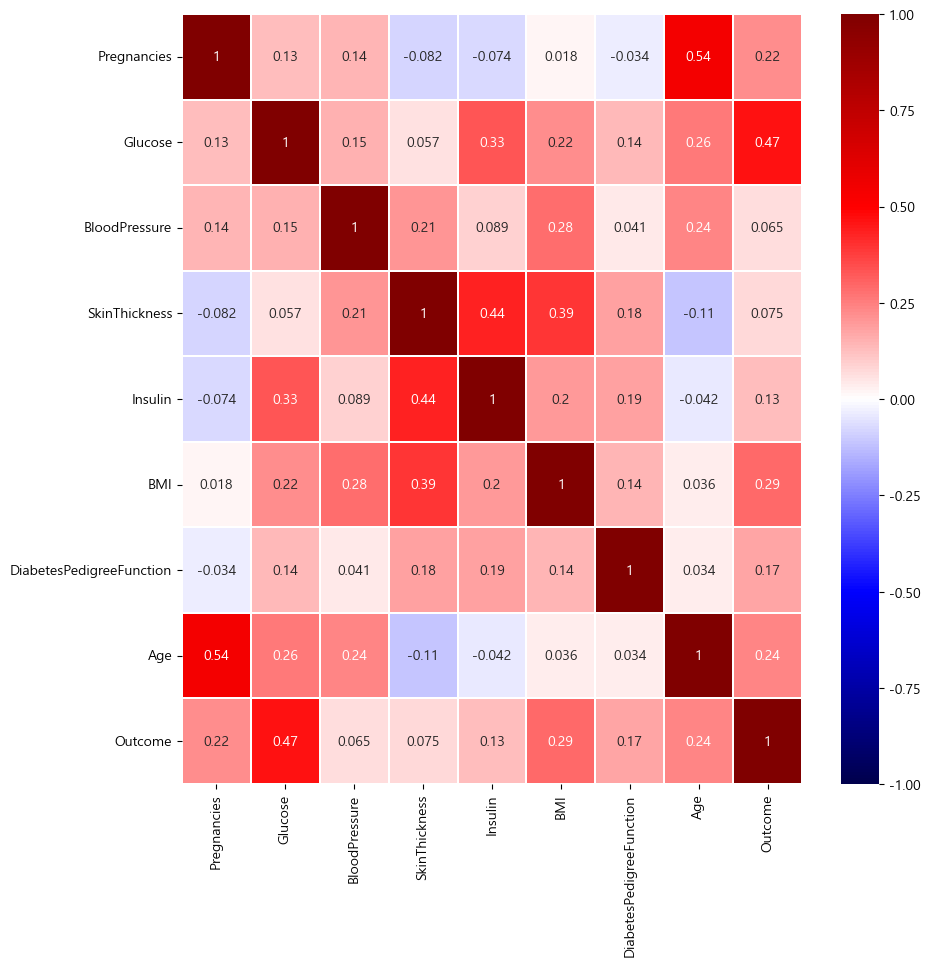

In [3]:
plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [4]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]].values

In [5]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

x_train, x_test, y_train, y_test = train_test_split(x_dataN, y_data, 
                                                    test_size=0.3, stratify=y_data) # stratify=y_data  label값이 골고루 분포되도록

In [6]:
# y_test

In [7]:
x_train.shape
feature_len = x_train.shape[1]

In [8]:
x = torch.FloatTensor(x_train)
y = torch.FloatTensor(y_train)

In [9]:
model = Sequential()
model.add_module('nn1', Linear(feature_len, 64)) # w:[8,1] b:[1]
model.add_module('sig1', ReLU()) # 활성함수
model.add_module('nn2', Linear(64, 32)) # w:[8,1] b:[1]
model.add_module('sig2', ReLU()) # 활성함수
model.add_module('nn3', Linear(32,1)) # w:[8,1] b:[1]
model.add_module('sig3', Sigmoid()) # 활성함수
loss_fn = torch.nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [10]:
hist=[]
for epoch in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Sigmoid(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print('cost=',cost.item())
    hist.append(cost.item())

cost= 0.6716009378433228
cost= 0.6592113971710205
cost= 0.6528282761573792
cost= 0.6491443514823914
cost= 0.6441146731376648
cost= 0.6371890902519226
cost= 0.6290080547332764
cost= 0.6204241514205933
cost= 0.6107458472251892
cost= 0.5993747711181641
cost= 0.5873453617095947
cost= 0.5747089982032776
cost= 0.561870813369751
cost= 0.5489996671676636
cost= 0.5363273024559021
cost= 0.5244601964950562
cost= 0.5135279893875122
cost= 0.5036351084709167
cost= 0.49474456906318665
cost= 0.4866638779640198
cost= 0.4795731008052826
cost= 0.4730192720890045
cost= 0.4672085642814636
cost= 0.46202629804611206
cost= 0.45794132351875305
cost= 0.45491790771484375
cost= 0.45236727595329285
cost= 0.45040661096572876
cost= 0.4490514099597931
cost= 0.44851943850517273
cost= 0.4476381838321686
cost= 0.4455726444721222
cost= 0.44461652636528015
cost= 0.44403186440467834
cost= 0.44176384806632996
cost= 0.4410206079483032
cost= 0.4400385022163391
cost= 0.43823397159576416
cost= 0.4371396601200104
cost= 0.4357934

cost= 0.28697293996810913
cost= 0.2832607626914978
cost= 0.28182947635650635
cost= 0.28290730714797974
cost= 0.2847389876842499
cost= 0.2864658832550049
cost= 0.2874985933303833
cost= 0.2863251566886902
cost= 0.28401002287864685
cost= 0.2813188135623932
cost= 0.27986299991607666
cost= 0.2795250415802002
cost= 0.2804792821407318
cost= 0.282446026802063
cost= 0.28467801213264465
cost= 0.2864731252193451
cost= 0.2864072918891907
cost= 0.2848455607891083
cost= 0.281688928604126
cost= 0.27884984016418457
cost= 0.2770528495311737
cost= 0.27667132019996643
cost= 0.2773403227329254
cost= 0.2784225344657898
cost= 0.27950334548950195
cost= 0.2807357907295227
cost= 0.28142911195755005
cost= 0.2809973955154419
cost= 0.2796778380870819
cost= 0.277791291475296
cost= 0.27586081624031067
cost= 0.27426958084106445
cost= 0.2731007933616638
cost= 0.27258026599884033
cost= 0.27248015999794006
cost= 0.2728802561759949
cost= 0.2740328013896942
cost= 0.27594301104545593
cost= 0.2789314091205597
cost= 0.28283

cost= 0.20966632664203644
cost= 0.20391760766506195
cost= 0.1996222734451294
cost= 0.20035089552402496
cost= 0.2058572918176651
cost= 0.21096892654895782
cost= 0.213724747300148
cost= 0.20962533354759216
cost= 0.20408298075199127
cost= 0.19884708523750305
cost= 0.19918493926525116
cost= 0.20363947749137878
cost= 0.20837900042533875
cost= 0.2119121551513672
cost= 0.20980429649353027
cost= 0.20602916181087494
cost= 0.19992487132549286
cost= 0.19696104526519775
cost= 0.19771793484687805
cost= 0.20068854093551636
cost= 0.20370733737945557
cost= 0.2044256627559662
cost= 0.2038414478302002
cost= 0.19990919530391693
cost= 0.1968754529953003
cost= 0.19553858041763306
cost= 0.19640478491783142
cost= 0.19857752323150635
cost= 0.20125949382781982
cost= 0.2042635828256607
cost= 0.20473739504814148
cost= 0.20405468344688416
cost= 0.20023807883262634
cost= 0.19705724716186523
cost= 0.19492433965206146
cost= 0.19430817663669586
cost= 0.19471165537834167
cost= 0.19622141122817993
cost= 0.1985030025243

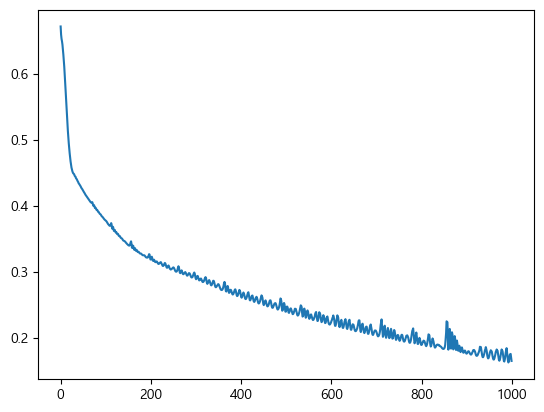

In [11]:
plt.plot(hist)
plt.show()

In [12]:
train_real = y_train
# train_real

In [13]:
train_pred = ( model.forward(x) > 0.5 ) + 0
# train_pred

In [14]:
f1_score(train_real, train_pred)

0.9153439153439152

In [15]:
test_real = y_test
# test_real

In [16]:
test_pred = ( model.forward(torch.FloatTensor(x_test)) > 0.5 ) + 0
# test_pred

In [17]:
f1_score(test_real, test_pred)

0.5497076023391813

In [18]:
y_test[0]

array([0], dtype=int64)

In [19]:
(model.forward(torch.FloatTensor(x_test[0].reshape(1,8))) > 0.5) + 0
# 8x64 64x32 32x1
# 1x8 8x64  1x64 64x32  1x32 32x1  1x1

tensor([[1]])